## <h1>Lesson 2. Regression analysis: How Much Is Your Car Worth?</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/Kelley_Blue_Book_Vertical.JPG/152px-Kelley_Blue_Book_Vertical.JPG" style="height:200px;">
  
  <p>This exercise will use data collected from <a href="https://www.kbb.com/">Kelly Blue Book</a> for 2005 for used General Motors (GM) cars. The overall goal is to predict the suggested retail price of the car (<a href="http://ww2.amstat.org/publications/jse/jse_data_archive.htm">Kuiper (2008), JSE</a>).</p>

<p>The following features are available for this dataset:</p>
<ul>
<li>Price: Suggested retail price of the used 2005 GM car</li>
<li>Mileage: Car mileage</li>
<li>Cylinder: Number of cylinders in the engine</li>
<li>Doors: Number of doors</li>
<li>Cruise: Does it have cruise control</li>
<li>Sound: Does it have upgraded sound?</li>
<li>Leather: Does it have leather seats?</li>
<li>Make columns (indicator variables):
    <ul>
        <li>Buick</li>
        <li>Cadillac</li>
        <li>Chevy</li>
        <li>Pontiac</li>
        <li>Saab</li>
        <li>...</li>
    </ul>
</li>
<li>Body Type columns (indicator variables):
    <ul>
        <li>convertible</li>
        <li>coupe</li>
        <li>hatchback</li>
        <li>sedan</li>
        <li>...</li>
    </ul>
</li>
</ul>


In [69]:
import pandas as pd
import numpy as np

cars = pd.read_csv('cars.csv')
cars.head()


,Price,Mileage,Cylinder,Doors,Cruise,Sound,Leather,Buick,Cadillac,Chevy,Pontiac,Saab,Saturn,convertible,coupe,hatchback,sedan,wagon
0,22661.05,20105,6,4,1,0,0,1,0,0,0,0,0,0,0,0,1,0
1,21725.01,13457,6,2,1,1,0,0,0,1,0,0,0,0,1,0,0,0
2,29142.71,31655,4,2,1,1,1,0,0,0,0,1,0,1,0,0,0,0
3,30731.94,22479,4,2,1,0,0,0,0,0,0,1,0,1,0,0,0,0
4,33358.77,17590,4,2,1,1,1,0,0,0,0,1,0,1,0,0,0,0


In [70]:
cars.info()

print(cars.index)
print(cars.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 18 columns):
Price          804 non-null float64
Mileage        804 non-null int64
Cylinder       804 non-null int64
Doors          804 non-null int64
Cruise         804 non-null int64
Sound          804 non-null int64
Leather        804 non-null int64
Buick          804 non-null int64
Cadillac       804 non-null int64
Chevy          804 non-null int64
Pontiac        804 non-null int64
Saab           804 non-null int64
Saturn         804 non-null int64
convertible    804 non-null int64
coupe          804 non-null int64
hatchback      804 non-null int64
sedan          804 non-null int64
wagon          804 non-null int64
dtypes: float64(1), int64(17)
memory usage: 113.1 KB
RangeIndex(start=0, stop=804, step=1)
Index(['Price', 'Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather',
       'Buick', 'Cadillac', 'Chevy', 'Pontiac', 'Saab', 'Saturn',
       'convertible', 'coupe', 'hatchback', 's

<h3>Q.1. Plot Price vs. Mileage. From the plot, does it seem like cars with more mileage are worth less?</h3>

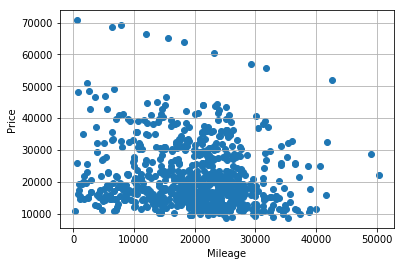

In [71]:
# Put the command (or commands) here that would give answer to the above question.
import matplotlib.pyplot as plt

mileage = cars.loc[:,'Mileage'].tolist()
price = cars.loc[:,'Price'].tolist()

plt.xlabel('Mileage')
plt.ylabel('Price')
plt.grid(True)
plt.scatter(mileage, price,label='Price vs. Mileage')

plt.show()


<h3>Q.2. Develop a simple linear regression model, relating price with mileage only. Show summary statistics for the model.</h3> 

0.01516944123548969


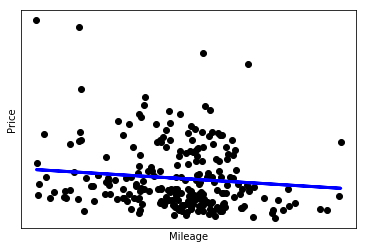

The equation is Y = -0.1415172954501876x + 24065.678557702002
Mean squared error: 105275335.74
Variance score: 0.03


In [72]:
# Linear regression model:
import matplotlib.pyplot as plt
from numpy import reshape
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.reshape.html
# from list to array
mileage_array = reshape(mileage,(-1, 1))
price_array = reshape(price,(-1, 1))

# Split the data into training/testing sets
mileage_train, mileage_test, price_train, price_test = train_test_split(mileage_array, price_array, test_size=0.3)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(mileage_train, price_train)

# The mean squared error
score = regr.score(mileage_train, price_train)
print(score)

# Make predictions using the testing set
price_pred = regr.predict(mileage_test)

# Plot outputs
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.grid(True)
plt.xticks(())
plt.yticks(())
plt.scatter(mileage_test, price_test,  color='black')
plt.plot(mileage_test, price_pred, color='blue', linewidth=3)
plt.show()


# Show summary statistics for the model:
# The coefficients
coeffs =  [regr.coef_[0][0], regr.intercept_[0]]
print('The equation is Y = {}x + {}'.format(*coeffs))


# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(price_test, price_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(price_test, price_pred))

def reg_eq(x):
    return coeffs[0]*x + coeffs[1]


Accuracy -1.62 (+/- 6.0)


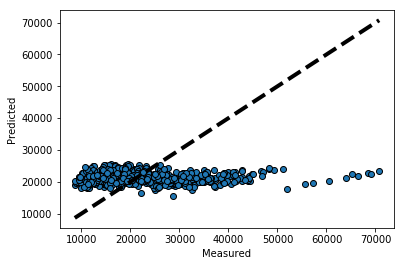

In [73]:
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
from sklearn.model_selection import cross_val_predict, cross_val_score
predicted = cross_val_predict(regr, mileage_array, price_array, cv=10)

scores = cross_val_score(regr, mileage_array, price_array, cv=10)
# print(scores)
print('Accuracy {} (+/- {})'.format(round(scores.mean(),2), round(scores.std() * 2),3))

fig, ax = plt.subplots()
ax.scatter(price_array, predicted, edgecolors=(0, 0, 0))
ax.plot([price_array.min(), price_array.max()], [price_array.min(), price_array.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

<h3>Q.3. What happens to price when there is one more mile on the car?</h3>

In [74]:
# Command:
print('when there is more mile on the price change with a delta equal to the slope ${}'.format(coeffs[0]))


when there is more mile on the price change with a delta equal to the slope $-0.1415172954501876


<h3>Q.4. What is the expected value of a car with 0 miles according to your model?</h3>

In [75]:
# Single command
print('The price for a car with 0 mile is ${}'.format(coeffs[1]))

The price for a car with 0 mile is $24065.678557702002


<h3>Q.5. Plot residuals of the model vs. fitted values. Are there any problems that you see with the model?</h3>

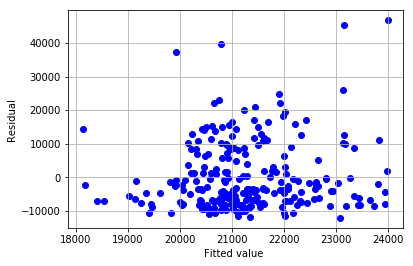

The absolute residual value has the same order of magnitude as the predicted value, hence the model is
 not precise


In [76]:
# Plot residuals
residual = [test - predicted for test, predicted in zip(price_test, price_pred)]

plt.xlabel('Fitted value ')
plt.ylabel('Residual')
plt.grid(True)
plt.scatter(price_pred, residual,  color='blue')
plt.show()


# if work on my own virtual env (I have added the yellowbrick library)
# is there a way to install a library into this cloud env?
'''
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(regr, hist=False)
visualizer.fit(mileage_train, price_train)  # Fit the training data to the model
visualizer.score(mileage_test, price_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data
'''

# Explain whether there are any problems (1-2 sentence)
#
print('The absolute residual value has the same order '
      'of magnitude as the predicted value, hence the model is\n not precise')

<h3>Q.6. Develop a model that predicts the Price from Mileage, Cylinder, Doors, Cruise, Sound, Leather data. Is this model more accurate - explain why (1-2 sentence). </h3>

0.462480458023657
The coefficient for Mileage is -0.11144676784164012
The coefficient for Cylinder is 3372.735355615868
The coefficient for Doors is -1516.6604189104403
The coefficient for Cruise is 5575.85678236877
The coefficient for Sound is -2332.4907522125204
The coefficient for Leather is 3303.124669809853
Mean squared error: 59801072.30
Variance score: 0.39
Accuracy -0.55 (+/- 3.0)


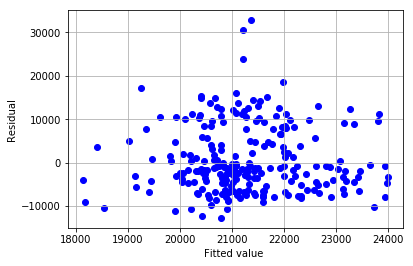

This model is more accurate


In [77]:
# Commands:
y = cars.loc[:,'Price']
X = cars.loc[:,['Mileage','Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

# The mean squared error
score = regr.score(X_train, y_train)
print(score)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

d_coeff_f = dict()
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regr.coef_[idx]))
    d_coeff_f[col_name] = regr.coef_[idx]
d_coeff_f['intercept'] = regr.intercept_ 
    
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(regr, X, y, cv=10)
scores = cross_val_score(regr, X, y, cv=10)
# print(scores)
print('Accuracy {} (+/- {})'.format(round(scores.mean(),2), round(scores.std() * 2),3))

# Plot residuals
residual = [test - predicted for test, predicted in zip(y_test, y_pred)]

plt.xlabel('Fitted value ')
plt.ylabel('Residual')
plt.grid(True)
plt.scatter(price_pred, residual,  color='blue')
plt.show()


'''
# Plot residuals
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(regr, hist=False)
visualizer.fit(mileage_train, price_train)  # Fit the training data to the model
visualizer.score(mileage_test, price_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data
'''

# Explain whether there are any problems (1-2 sentence)
print('This model is more accurate')


<h3>Q.7. Are any of the features in the above model highly colinear to the point where they impact the model quality?</h3>

In [78]:
# Command(s):
# Comment on the result
col_factor = 0.25
# Abs of the corr matrix
corr_matrix = X.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

print(upper)

# Find index of feature columns with correlation greater than col_factor
to_drop = [column for column in upper.columns if any(upper[column] > col_factor)]

print('with a criteria of {} correlation, there is these parameters {} to drop'.format(col_factor, to_drop))
print('As a conclusion, none of the parameters have to be dropped')


          Mileage  Cylinder     Doors    Cruise     Sound   Leather
Mileage       NaN  0.029461  0.016944  0.025037  0.026146  0.001005
Cylinder      NaN       NaN  0.002206  0.354285  0.089704  0.075520
Doors         NaN       NaN       NaN  0.047674  0.062530  0.061969
Cruise        NaN       NaN       NaN       NaN  0.091730  0.070573
Sound         NaN       NaN       NaN       NaN       NaN  0.165444
Leather       NaN       NaN       NaN       NaN       NaN       NaN
with a criteria of 0.25 correlation, there is these parameters ['Cruise'] to drop
As a conclusion, none of the parameters have to be dropped


0.3676783093147022
The coefficient for Mileage is -0.12160179019445881
The coefficient for Cylinder is 3801.542033550811
The coefficient for Doors is -1521.51910046794
The coefficient for Sound is -1726.265158524128
The coefficient for Leather is 2489.2236658108577
Mean squared error: 59856899.97
Variance score: 0.41
Accuracy -0.62 (+/- 3.0)


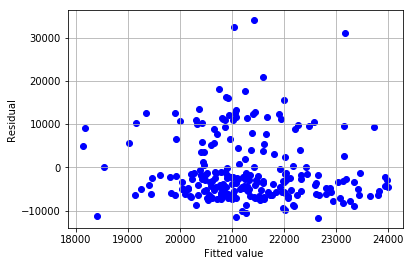

          Mileage  Cylinder     Doors     Sound   Leather
Mileage       NaN  0.029461  0.016944  0.026146  0.001005
Cylinder      NaN       NaN  0.002206  0.089704  0.075520
Doors         NaN       NaN       NaN  0.062530  0.061969
Sound         NaN       NaN       NaN       NaN  0.165444
Leather       NaN       NaN       NaN       NaN       NaN
with a criteria of 0.25 correlation, there is these parameters [] to drop
As a conclusion, none of the parameters have to be dropped


In [79]:
# Commands:
y = cars.loc[:,'Price']
X = cars.loc[:,['Mileage','Cylinder', 'Doors', 'Sound', 'Leather']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

# The mean squared error
score = regr.score(X_train, y_train)
print(score)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

d_coeff = dict()
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regr.coef_[idx]))
    d_coeff[col_name] = regr.coef_[idx]
d_coeff['intercept'] = regr.intercept_ 
    
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(regr, X, y, cv=10)
scores = cross_val_score(regr, X, y, cv=10)
# print(scores)
print('Accuracy {} (+/- {})'.format(round(scores.mean(),2), round(scores.std() * 2),3))

# Plot residuals
residual = [test - predicted for test, predicted in zip(y_test, y_pred)]

plt.xlabel('Fitted value ')
plt.ylabel('Residual')
plt.grid(True)
plt.scatter(price_pred, residual,  color='blue')
plt.show()

col_factor = 0.25
# Abs of the corr matrix
corr_matrix = X.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

print(upper)

# Find index of feature columns with correlation greater than col_factor
to_drop = [column for column in upper.columns if any(upper[column] > col_factor)]

print('with a criteria of {} correlation, there is these parameters {} to drop'.format(col_factor, to_drop))
print('As a conclusion, none of the parameters have to be dropped')



<h3>Q.8. What is the expected price for the Chevy sedan described in variable 'chevy', shown below?</h3>

In [80]:
def price(**kwargs):
    price = d_coeff['intercept']
    for key, value in kwargs.items():
        if key in d_coeff.keys():
            price += d_coeff[key] * value
    return price
    
    
chevy = {"Mileage":30000, "Cylinder":4, "Doors":2, "Cruise":1, "Sound":1, "Leather":1}
# Commands that estimate the price of 'chevy' using the model with 6 predictors

print(price(**chevy))


17980.510522939243


<h3>Q.9. What is the expected price for the Chevy mentioned above if you include all features in the prediction? Can you comment on any problems you encounter when doing this prediction?</h3>

In [82]:
# Commands
def price(**kwargs):
    price = d_coeff_f['intercept']
    for key, value in kwargs.items():
        if key in d_coeff_f.keys():
            price += d_coeff_f[key] * value
    return price
    
    
chevy = {"Mileage":30000, "Cylinder":4, "Doors":2, "Cruise":1, "Sound":1, "Leather":1}
# Commands that estimate the price of 'chevy' using the model with 6 predictors

print(price(**chevy))



# Comments on problems
#
print('This prediction is overstating the price of the car because of the colinerarity of the luxury features')

19635.150799175222
This prediction is overstating the price of the car because of the colinerarity of the luxury features
